# Path Lengths

In [25]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"

In [3]:
#load results into dataframe (~ 1min runtime)

results_path = "/Users/mark/Desktop/wiki_v4/"
with open(results_path + "lengths.json") as f:
    dict = json.load(f)
df = pd.DataFrame(dict.items())
df.columns = ['page', 'path length']

## Articles with the Longest Path Length 
**path length:** number of first link traversals up to a repeated article or an invalid link

In [6]:
df.sort(columns='path length', ascending=False).head(50)
 

,page,path length
3822443,Holy fathers slain at sinai and raithu,366
4307586,Martyrs of Raithu,366
348831,Holly fathers slain at Sinai and Raithu,366
5246648,January 19 (Eastern Orthodox liturgics),365
4725606,March 5 (Eastern Orthodox liturgics),365
6494442,September 12 (Orthodox Liturgics),365
3852463,June 28 (Eastern Orthodox liturgics),365
9746286,October 8 (Eastern Orthodox liturgics),365
6916418,June 10 (Eastern Orthodox Liturgics),365
222840,October 2 (Eastern Orthodox liturgics),365


## Excluding Liturgics...


In [14]:
top1k= df.sort(columns='path length', ascending=False).head(1000)
top1k[top1k['page'].apply(lambda e: "liturgics" not in e.lower())]


,page,path length
3822443,Holy fathers slain at sinai and raithu,366
4307586,Martyrs of Raithu,366
348831,Holly fathers slain at Sinai and Raithu,366
9349535,Holy fathers slain at Sinai and Raithu,365
3747101,2007 in Scotland,104
1672735,2005 in Scotland,103
5940038,2006 in Scotland,103
3427709,2003 in Scotland,102
5483187,2004 in Scotland,102
9082217,2001 in Scotland,101


## What's the total path length traversed?

In [52]:
df['path length'].sum()

232356935

##How many pages lead to dead links (or themselves)?


In [20]:
df[df['path length'] == 0].count()

page           550220
path length    550220
dtype: int64

## a sample: 

In [21]:
df[df['path length'] == 0].head(10)

,page,path length
21,Lowry model,0
32,Mismagius (Pokémon),0
74,2002 Summer Camp Music Festival,0
126,Rvd tv,0
146,La Resistencia (gang),0
158,Presidency of William McKinley,0
191,Chen Ying (Three Kingdoms),0
204,Margot Grimmer,0
208,Ghost (novel),0
252,Small Swiss Hound,0


## How many articles have a path length of 2?
_includes invalid links_

In [48]:
df[df['path length'] == 2].count()

page           326814
path length    326814
dtype: int64

## How many articles have a path length of 3?
_includes invalid links_

In [50]:
df[df['path length'] == 3].count()

page           247101
path length    247101
dtype: int64

## What's the most frequent path length?

In [45]:
df['path length'].mode()

0    29
dtype: int64

##How many pages have a path length of 29?

In [46]:
df[df['path length'] == 29].count()

page           698089
path length    698089
dtype: int64

## Summary Statistics

In [25]:
df.describe()

,path length
count,11277534.000000
mean,20.603523
std,12.504190
min,0.000000
25%,7.000000
50%,26.000000
75%,30.000000
max,366.000000


75% of pages traverse fewer than 30 first links!

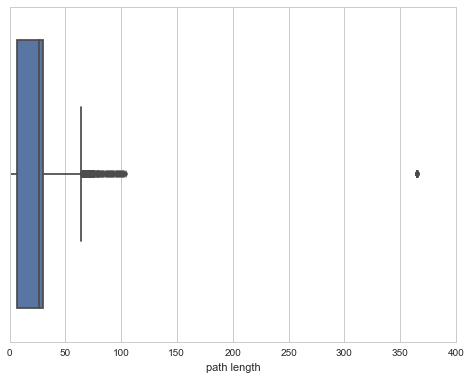

In [8]:
plt.figure(figsize=(8,6))

sns.set_style("whitegrid")
sns.boxplot(x=df["path length"])

plt.savefig(path+'path_lengths_boxplot.png', format='png', dpi=300, bbox_inches='tight')


## Density Plots 

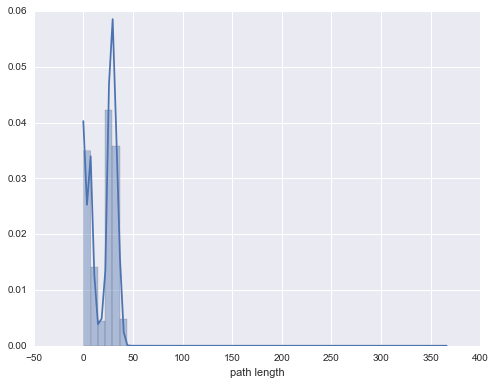

In [5]:
plt.figure(figsize=(8,6))

sns.distplot(df["path length"])

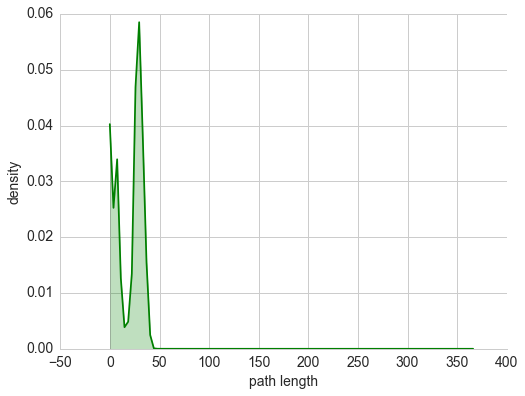

In [23]:
# runtime ~3min

plt.figure(figsize=(8,6))

with sns.axes_style("whitegrid"):
    sns.kdeplot(df["path length"], shade=True, legend=False, color='g')
    sns.despine(left=True)

#make axis font size larger
plt.tick_params(axis='both', which='major', labelsize=14)

#labels
plt.xlabel("path length", fontsize=14)
plt.ylabel("density", fontsize=14)


#save
plt.savefig(path+'path_lengths_dist.png', format='png', dpi=300, bbox_inches='tight')


### in log space

ValueError: array must not contain infs or NaNs

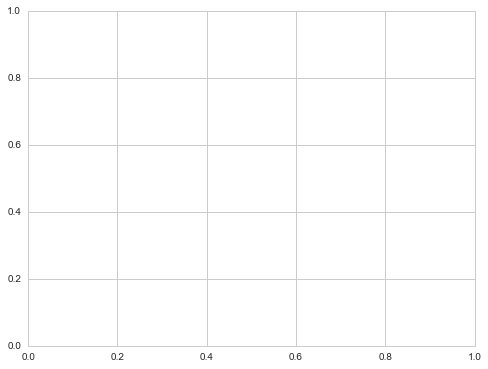

In [26]:
# runtime ~3min

plt.figure(figsize=(8,6))

with sns.axes_style("whitegrid"):
    sns.kdeplot(np.log(df["path length"]), shade=True, legend=False, color='g')
    sns.despine(left=True)

#make axis font size larger
plt.tick_params(axis='both', which='major', labelsize=14)

#labels
plt.xlabel("path length", fontsize=14)
plt.ylabel("density", fontsize=14)


#save
plt.savefig(path+'path_lengths_dist.png', format='png', dpi=300, bbox_inches='tight')


## Distribution of Path Lengths

In [41]:
toppdf_10k = df.sort(columns='path length', ascending=False).head(10000)['path length']
toppdf_1k = df.sort(columns='path length', ascending=False).head(1000)['path length']
toppdf_100 = df.sort(columns='path length', ascending=False).head(100)['path length']


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

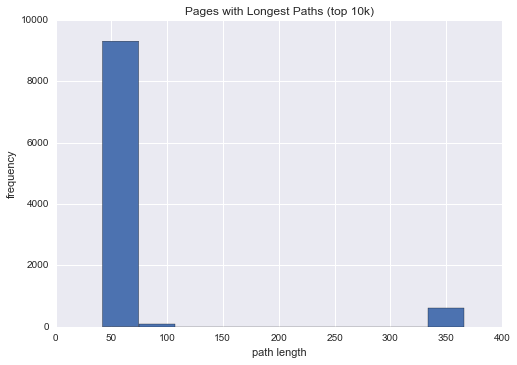

In [40]:
visits_plot1 = toppdf_10k.plot(kind='hist', title="Pages with Longest Paths (top 10k)")
visits_plot1.set_xlabel("path length")
visits_plot1.set_ylabel("frequency")

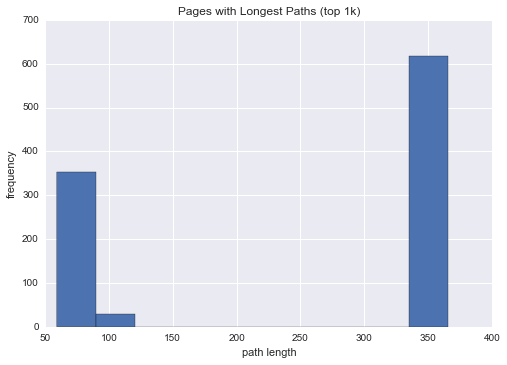

In [42]:
visits_plot2 = toppdf_1k.plot(kind='hist', title="Pages with Longest Paths (top 1k)")
visits_plot2.set_xlabel("path length")
visits_plot2.set_ylabel("frequency")

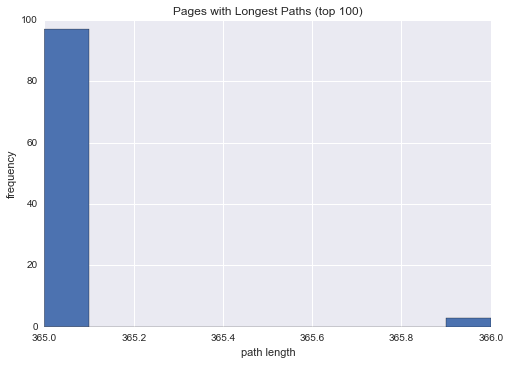

In [44]:
visits_plot3 = toppdf_100.plot(kind='hist', title="Pages with Longest Paths (top 100)")
visits_plot3.set_xlabel("path length")
visits_plot3.set_ylabel("frequency")